<a href="https://colab.research.google.com/github/m1k2l3/JSC270-Works/blob/main/Copy_of_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1: DELVE COVID data

## Learning objectives:

1.   Understanding the DELVE COVID-19 dataset and how it is displayed in the current notebook
2.   Modifying code to update figures
3.   Reading in, wrangling, and plotting data on your own!

###Go to https://rs-delve.github.io/data_software/global-dataset.html and read about the DELVE Global COVID-19 Dataset.

###Open the python notebook which was used to produce the data exploration on the DELVE website ([here](https://colab.research.google.com/github/rs-delve/covid19_datasets/blob/master/Data_Exploration.ipynb)) and review the code that was used.

###Now read the DELVE data into colab
####Hint: double clicking on the code cells in the DELVE colab, it will show you the code (i.e. the notebook is set to hide the code), you can copy that cell's content ant paste it in the code cell below

In [2]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output, display
import ipywidgets as widgets
from datetime import datetime, date, timedelta

path = 'https://raw.githubusercontent.com/rs-delve/covid19_datasets/master/dataset/combined_dataset_latest.csv'
df = pd.read_csv(path, parse_dates=['DATE'])

###Explore the columns of the dataframe using .describe()

In [3]:
df.describe()

,DATE,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,...,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
count,156145,152853.000000,152841.000000,152842.000000,152791.000000,152814.000000,152790.000000,152791.000000,152822.000000,152769.000000,...,1.369400e+05,4232.000000,608.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000
mean,2021-02-21 00:00:00.000000512,1.491047,1.379205,1.341006,2.525967,0.529094,0.957419,0.775419,2.340246,0.762877,...,6.933605e+06,118.685821,824.492783,0.000036,0.011411,189.244193,19.340536,15.662197,23.382182,3.510201
min,2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.130000e+03,-298.634510,-2090.441573,0.000000,0.000382,0.240429,-28.269835,-36.281255,-19.346130,0.781301
25%,2020-07-27 00:00:00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,4.656155e+05,-5.085714,-37.800000,0.000001,0.006594,156.161128,13.695513,9.219760,18.128939,2.255559
50%,2021-02-21 00:00:00,1.000000,2.000000,2.000000,3.000000,0.000000,1.000000,0.000000,2.000000,1.000000,...,1.512602e+06,43.527889,301.363483,0.000011,0.011403,202.137401,21.727503,17.443256,26.173631,3.034009
75%,2021-09-18 00:00:00,3.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,3.000000,1.000000,...,5.448268e+06,164.988925,1152.323174,0.000043,0.016318,234.790844,26.429332,23.607332,29.594597,4.190054
max,2022-04-14 00:00:00,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,...,2.004801e+08,1835.824117,12850.768820,0.002657,0.025842,389.408752,39.779094,35.386502,47.689189,19.476713
std,NaN,1.125447,0.969666,0.788743,1.548291,0.687834,0.924409,0.895428,1.216564,0.765605,...,2.096006e+07,242.809764,1698.439041,0.000068,0.005347,64.843065,9.008982,9.374045,9.188666,1.844418


###Now create a new dataframe summarizing average values for each country in each column and display it in the notebook



In [4]:
df.groupby('country_name').mean(numeric_only=True)


,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,...,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.233939,1.499394,1.128485,0.848485,0.696970,0.426667,0.448485,1.667879,0.000000,0.037576,...,9292896.0,NaN,NaN,0.000021,0.005995,185.438330,13.614276,7.350657,19.730927,2.427583
Albania,1.675373,1.319652,1.532338,3.164179,0.378109,1.529851,0.470149,1.713930,0.936567,1.046020,...,302886.0,NaN,NaN,0.000031,0.007237,179.588922,13.379447,8.698013,18.531704,2.181171
Algeria,1.356971,1.550481,1.554087,3.435096,1.235577,1.423077,0.906250,2.826923,0.393029,1.104567,...,7766182.0,NaN,NaN,0.000014,0.008208,193.742416,17.430347,12.708320,22.455916,3.471161
Andorra,1.078125,1.495192,1.259615,2.656250,0.783654,0.206731,0.051683,1.580529,1.793269,1.262019,...,NaN,NaN,NaN,0.000030,0.006175,177.429576,6.740901,1.786306,11.818287,1.703644
Angola,1.074789,1.835947,1.338963,2.880579,0.811821,1.148372,1.463209,2.867310,0.143546,0.221954,...,5698765.0,NaN,NaN,0.000036,0.016167,199.819331,24.547785,21.878891,27.995213,2.649455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1.978182,1.922424,1.583030,2.958788,1.327273,1.318788,1.527273,3.202424,0.447273,0.489697,...,14309682.0,NaN,NaN,0.000038,0.016976,187.507023,25.915867,22.974523,29.811969,3.119722
"Virgin Islands, U.S.",1.833738,1.075243,0.898058,2.584951,0.120146,0.765777,0.330097,0.908981,0.649272,0.433252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,1.069091,0.766061,0.739394,0.000000,0.000000,1.436364,0.796364,2.395152,0.000000,0.000000,...,6417807.0,NaN,NaN,0.000017,0.012250,211.079073,22.518829,17.413003,28.410415,3.660751


###Copy the code which generates the "Timline of NPI Introduction for Selected Countries" graph and comment each command describing what was done, e.g.:



```
## add a column to plot_df which replaces the npi name with its enumerated index value
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})
```



###Next, change the colors on the graph to group NPIs with the same color in the following way:
* all canceling/closures (e.g. "npi_cancel_public_events", "npi_school_closing","npi_close_public_transport", "npi_workplace_closing")
* all money-related interventions (e.g. "npi_income_support")
* all testing and PPE interventions (e.g. "npi_contact_tracing", "npi_masks")
* remaining NPIs (e.g. "npi_internal_movement_restrict")

######Hint: create a new column in plot_df that you can use for the 'hue' argument in the sns.relplot function

###Comment the code you added to make this change

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


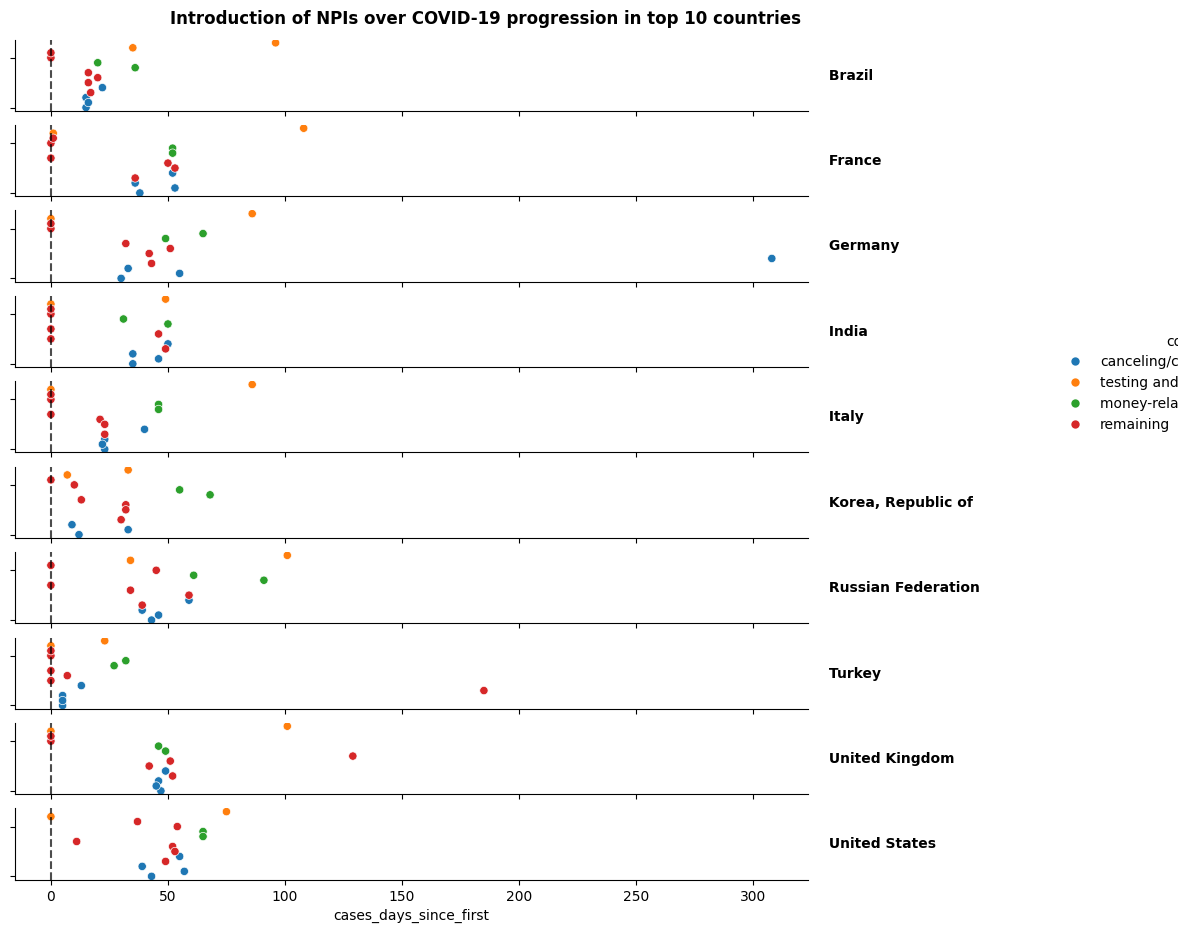

In [6]:
#@title Timeline Plot
# This create a list of names for the npis
npis = [
        'npi_school_closing',
        'npi_workplace_closing',
        'npi_cancel_public_events',
        'npi_gatherings_restrictions',
        'npi_close_public_transport',
        'npi_stay_at_home',
        'npi_internal_movement_restrictions',
        'npi_international_travel_controls',
        'npi_income_support',
        'npi_debt_relief',
        'npi_public_information',
        'npi_testing_policy',
        'npi_contact_tracing',
        'npi_masks',
]

# Group the dataset by the countries and keep those with the 10 largest country based on total cases of covid
countries = df.groupby('country_name').cases_total.max().nlargest(10).index

# Get data frame's rows where the country name is in the 10 biggest country, obtain the npis as well as name and case days since first. Use country name and cases day as identify and variales using NPI.
plot_df = df[df.country_name.isin(countries)][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')

# Sort the ID
plot_df = plot_df.sort_values(['country_name', 'cases_days_since_first'])

# Remove rows with 0 cases
plot_df = plot_df[plot_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()

# Add a column to plot_df which replaces the npi name with its enumerated index value
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})

# Define NPI group mapping
npi_groups = {
        'npi_school_closing' : "canceling/closures",
        'npi_workplace_closing' : "canceling/closures",
        'npi_cancel_public_events' :  "canceling/closures",
        'npi_gatherings_restrictions' : "remaining",
        'npi_close_public_transport' :  "canceling/closures",
        'npi_stay_at_home' : "remaining",
        'npi_internal_movement_restrictions' : "remaining",
        'npi_international_travel_controls' : "remaining",
        'npi_income_support' : "money-related interventions",
        'npi_debt_relief' : "money-related interventions",
        'npi_public_information' : "remaining",
        'npi_testing_policy' : "remaining",
        'npi_contact_tracing' : "testing and PPE interventions",
        'npi_masks' : "testing and PPE interventions"
}

# Add a new column for plotting the color change
plot_df['color'] = plot_df.NPI.map(npi_groups)

# Create a figure
g = sns.relplot(data=plot_df,
                x='cases_days_since_first',
                y='value',
                hue='color',
                row='country_name',
                kind='scatter',
                height=1,
                aspect=10,
                marker='o',
                facet_kws=dict(margin_titles=True, legend_out=True, despine=True))

# Add a legend
for ax in g.axes.flat:
  txt = ax.texts[0]
  ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
          txt.get_text().split('=')[1],
          transform=ax.transAxes,
          va='center',
          fontweight='bold')
  ax.texts[0].remove()
  ax.set_ylabel(None)
  ax.set_yticklabels([])
  ax.axvline(0, ls='--', c='k', alpha=0.7)

g.fig.suptitle('Introduction of NPIs over COVID-19 progression in top 10 countries', fontweight='bold')

leg = g._legend
leg.set_bbox_to_anchor([1.05, 0.55])

plt.subplots_adjust(top=0.95)
plt.show()

###In the DELVE data exploration, they add a widget to allow the user to select only data from a specific country to display. Let's add a widget here and only show the data from one country. It's okay if your country-specific graph is simpler than the ones above (e.g. no dashed horizontal line).

Dropdown(description='Country:', index=176, options=(('Afghanistan', 'Afghanistan'), ('Albania', 'Albania'), (…

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


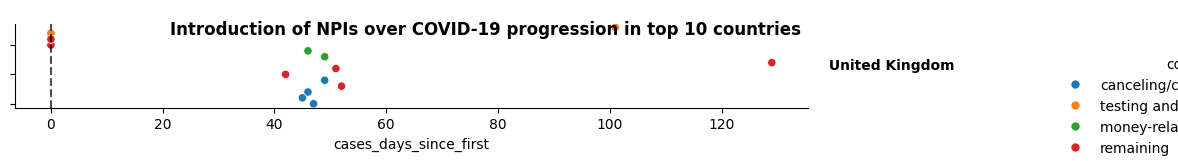

In [10]:
def add_widget(country):
  country_widget = widgets.Dropdown(
      options=sorted([(c, c) for c in df.country_name.unique()]),
      value=country,
      description='Country:',
  )

  country_widget.observe(lambda d: plot_country(d['new']), 'value')
  display(country_widget)

def plot_country(country):
  clear_output()
  add_widget(country)
  # Get data frame's rows where the country name is in the 10 biggest country, obtain the npis as well as name and case days since first. Use country name and cases day as identify and variales using NPI.
  plot_df = df[df.country_name.isin([country])][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')

  # Sort the ID
  plot_df = plot_df.sort_values(['country_name', 'cases_days_since_first'])

  # Remove rows with 0 cases
  plot_df = plot_df[plot_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()

  # Add a column to plot_df which replaces the npi name with its enumerated index value
  plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})

  # Define NPI group mapping
  npi_groups = {
        'npi_school_closing' : "canceling/closures",
        'npi_workplace_closing' : "canceling/closures",
        'npi_cancel_public_events' :  "canceling/closures",
        'npi_gatherings_restrictions' : "remaining",
        'npi_close_public_transport' :  "canceling/closures",
        'npi_stay_at_home' : "remaining",
        'npi_internal_movement_restrictions' : "remaining",
        'npi_international_travel_controls' : "remaining",
        'npi_income_support' : "money-related interventions",
        'npi_debt_relief' : "money-related interventions",
        'npi_public_information' : "remaining",
        'npi_testing_policy' : "remaining",
        'npi_contact_tracing' : "testing and PPE interventions",
        'npi_masks' : "testing and PPE interventions"
  }

  # Add a new column for plotting the color change
  plot_df['color'] = plot_df.NPI.map(npi_groups)

  # Create a figure
  g = sns.relplot(data=plot_df,
                  x='cases_days_since_first',
                  y='value',
                  hue='color',
                  row='country_name',
                  kind='scatter',
                  height=1,
                  aspect=10,
                  marker='o',
                  facet_kws=dict(margin_titles=True, legend_out=True, despine=True))

  # Add a legend
  for ax in g.axes.flat:
    txt = ax.texts[0]
    ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
            txt.get_text().split('=')[1],
            transform=ax.transAxes,
            va='center',
            fontweight='bold')
    ax.texts[0].remove()
    ax.set_ylabel(None)
    ax.set_yticklabels([])
    ax.axvline(0, ls='--', c='k', alpha=0.7)

  g.fig.suptitle('Introduction of NPIs over COVID-19 progression in top 10 countries', fontweight='bold')

  leg = g._legend
  leg.set_bbox_to_anchor([1.05, 0.55])

  plt.subplots_adjust(top=0.95)
  plt.show()

plot_country('United Kingdom')

###Now find a COVID-19 dataset available online on your own. The U of T library has a pretty good resource here to help you find some: https://mdl.library.utoronto.ca/covid-19/data

###Read the data into python and create a figure with a widget that allows users to interact with the graph.

###Finally, write a caption in your notebook describing the figure you've created